In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100, n_features=4, noise=5)

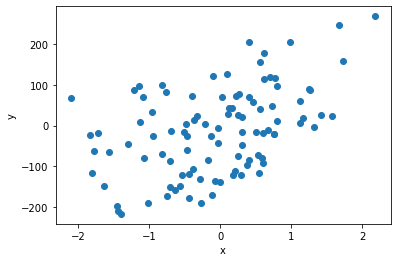

In [3]:
# visualize the data
plt.scatter(x[:,0],y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
NUM_TRIALS = 30


tuned_parameters = [{'solver' : ['svd', 'lsqr'],'fit_intercept': ['True'],'normalize': ['False']},
                    {'solver' : ['sag', 'cholesky'],'fit_intercept': ['False'],'normalize': ['true']}]

score = 'r2'
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)


In [11]:
#tes train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [21]:
#grid search 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [22]:
from sklearn.model_selection import KFold,cross_val_score

In [24]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # model= GridSearchCV(linear_model.LinearRegression(), tuned_parameters, scoring= score)
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    model= GridSearchCV(estimator = Ridge(), param_grid = tuned_parameters, scoring = score)
    model.fit(x_train, y_train)
    non_nested_scores[i] = model.best_score_
    
    
    # Nested CV with parameter optimization
    model = GridSearchCV(estimator= Ridge(), param_grid = tuned_parameters, cv=inner_cv, scoring= score)
    nested_score = cross_val_score(model, X=x_train, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    
    

In [25]:
score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))
    

Average difference of -0.046754 with std. dev. of 0.030337.
